![image alt ><](./img/streaming.jpg)

<h1 style="font-family:verdana;">Movie Streaming Analysis</h1>

<img src="./img/imdb_logo.jpeg" width="50" height="75" style="float:left">
<h1 style="font-size:100%; ">This Notebook projects plots and visuals to determine the rankings of the top rated movies on IMDB platform.
it also provides information on genres and trends of the most voted movies by viewers</h1>





# Project Questions
>What we want to figure out with this data is to sift through over 85,854 movie titles  by analyzing in depth the various relationships such as genre & audience and poplarity  in order to calculate the rank of movies and TV shows in the lists of the most voted films and programs. What we want to figure out with this data is to sift through over 85,854 movie titles  by analyzing in depth the various relationships such as genre & audience and poplarity  in order to calculate the rank of movies and TV shows in the lists of the most voted films and programs. 





## Project Requirment
>technical analysis regarding Microsoft business case to start a new movie studio
data analytics are used by movie and television studios to give each production its best chance at success


## Data Resources & Collection
>the data used in this notebook mainly based on 'IMDB'  and come from over 85,000 Movie Database  hosted on kaggle.com and compiled by user stefanoleone992. The IMDB ratings are the average score, which can range from 1 to 10, submitted by users of IMDB.com.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')
%run PandasDataframeFunctions.ipynb
pdf=PandasDataframeFunctions
#%run 'jupyter_display.ipynb'
imdb_movie=pd.read_csv('https://github.com/akladyous/imdb_movie_analysis/raw/main/data/IMDb%20movies.gz', low_memory=False)
imdb_ratings=pd.read_csv('https://github.com/akladyous/imdb_movie_analysis/raw/main/data/IMDb%20ratings.gz')

## Cleaning Data
<img src="./img/arrow_down.png" width="25" height="25" style="float:left">


In [2]:
imdb = pd.merge(imdb_movie,imdb_ratings, left_on='imdb_title_id', right_on='imdb_title_id')
pdf.dropcol(imdb,60)
imdb.drop(imdb[imdb['year'].str.contains('[A-Za-z]')].index, inplace=True)
imdb['year']=imdb['year'].astype(np.dtype('int32'))
if imdb['votes'].equals(imdb['total_votes']): imdb.drop('votes', axis=1, inplace=True)
imdb.drop_duplicates(subset=['title'], keep='last', inplace=True)
imdb.dropna(subset=['country'], inplace=True)
imdb.dropna(subset=['non_us_voters_votes'], inplace=True)
imdb.dropna(subset=['us_voters_votes'], inplace=True)

## Data Analysis
<img src="./img/arrow_down.png" width="25" height="25" style="float:left">

In [155]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81822 entries, 0 to 85854
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              81822 non-null  object 
 1   title                      81822 non-null  object 
 2   original_title             81822 non-null  object 
 3   year                       81822 non-null  int32  
 4   date_published             81822 non-null  object 
 5   genre                      81822 non-null  object 
 6   duration                   81822 non-null  int64  
 7   country                    81822 non-null  object 
 8   language                   81064 non-null  object 
 9   director                   81748 non-null  object 
 10  writer                     80326 non-null  object 
 11  production_company         77538 non-null  object 
 12  actors                     81758 non-null  object 
 13  description                79815 non-null  obj

In [156]:
imdb.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,1.0,2.0,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,7.0,7.0,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,5.0,2.0,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,31.0,14.0,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,13.0,5.0,5.7,484,5.8,6.0,33,15,48,80,123,77,36,20,18,34,5.6,35.0,5.6,177.0,5.8,168.0,5.7,354.0,5.6,32.0,5.7,159.0,5.8,151.0,5.8,31.0,6.3,3.0,5.1,13.0,6.5,15.0,5.5,67.0,5.9,173.0,5.6,181.0


## Duration Analysis

<img src="./img/arrow_down.png" width="25" height="25" style="float:left">

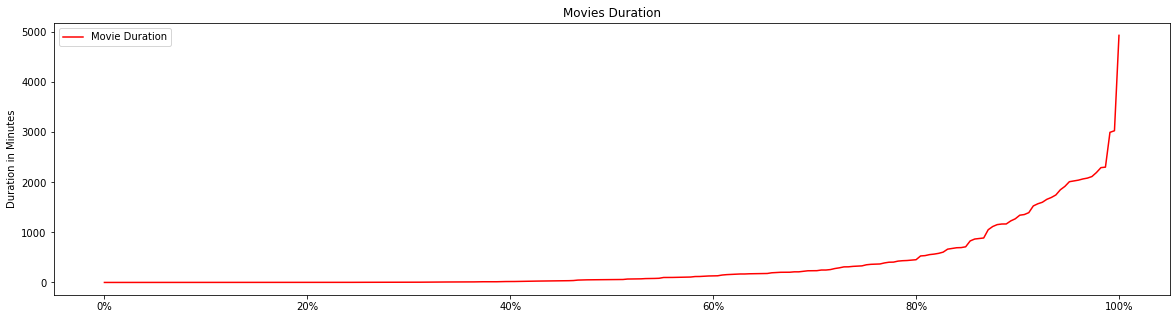

In [157]:
#imdb analysis by duration


unique_duration_dict      = dict()
unique_duration_key       = list()
unique_duration_value     = list()
unique_duration_all       = imdb['duration'].unique().tolist()
unique_duration_condition = sorted([x for x in unique_duration_all if x>= 45 and x <= 300])
duration_filter1          = (imdb['duration'] >= 45) & (imdb['duration'] <= 300) 

for duration in unique_duration_condition:
    unique_duration_dict[duration]= ((imdb['duration']==duration) & (duration_filter1)).sum()    

unique_duration_key       = [k for k,v in sorted(unique_duration_dict.items(), key=lambda d:d[1], reverse=False)]
unique_duration_value     = [v for k,v in sorted(unique_duration_dict.items(), key=lambda d: d[1], reverse=False)]
 

x = np.linspace(0,100,len(unique_duration_value))
fmt = '%.0f%%'
fig = plt.figure(figsize=[20,5])
fig.tight_layout()
ax1=fig.add_subplot()
ax1.set_ylabel('Duration in Minutes')
ax1.set_title("Movies Duration")
xticks = mtick.FormatStrFormatter(fmt)
ax1.xaxis.set_major_formatter(xticks)
ax1.plot(x,unique_duration_value , color='r', label='Movie Duration')

ax1.legend(loc='upper left')
plt.show()

## Genres Analysis

<img src="./img/arrow_down.png" width="25" height="25" style="float:left">

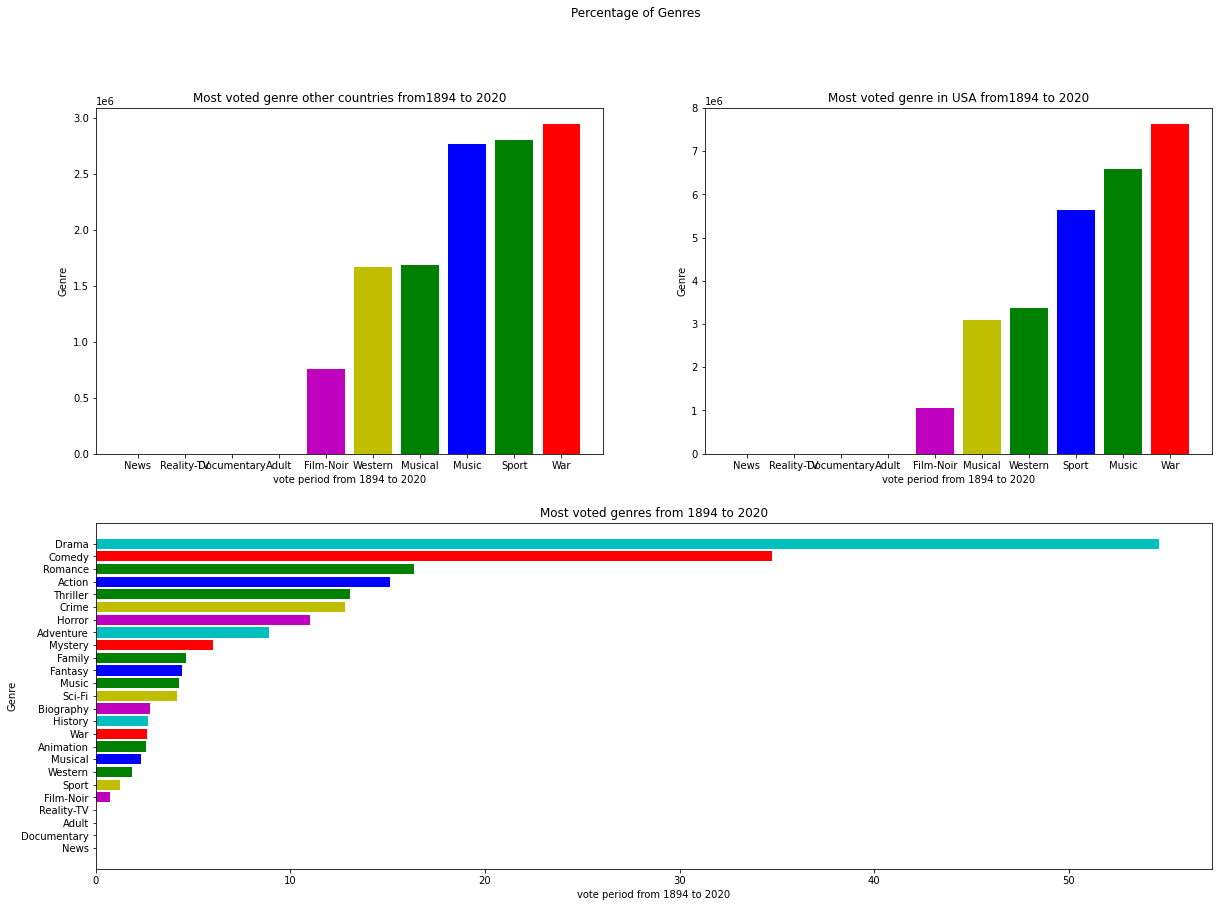

<Figure size 432x288 with 0 Axes>

In [15]:
#imdb analysis by genres

unique_genres=set()
genres=dict()
for line in imdb['genre']:
    unique_genres.update(item for item in {*line.split(', ')})

for item in unique_genres:
    genres[item]=imdb['genre'].str.contains(item).sum() #
    Unique_genres_list_reverse = [(k) for k,v in sorted(genres.items(), key=lambda item : item[1], reverse=False)]
genre_voted_percent = [(v/imdb['genre'].size*100) for k,v in sorted(genres.items(), key=lambda item : item[1], reverse=False) ]    


non_us_voters_votes = dict()
us_voters_votes = dict()
for i, r in imdb.iterrows():
    g=pdf.unpack_values(r['genre'])
    for genre in g:
        if genre in r['genre']:
            if not non_us_voters_votes.get(genre) : 
                non_us_voters_votes[genre]  = r['non_us_voters_votes']
            else:
                non_us_voters_votes[genre] += r['non_us_voters_votes']
            if not us_voters_votes.get(genre):
                us_voters_votes[genre] = r['us_voters_votes']
            else:
                us_voters_votes[genre] += r['us_voters_votes']

us_genre_votes_k      = [k for k,v in sorted(us_voters_votes.items(),     key=lambda k : k[1], reverse=False)][:10]
us_genre_votes_v      = [v for k,v in sorted(us_voters_votes.items(),     key=lambda k : k[1], reverse=False)][:10]                
non_us_genre_votes_k  = [k for k,v in sorted(non_us_voters_votes.items(), key=lambda k : k[1], reverse=False)][:10]
non_us_genre_votes_v  = [v for k,v in sorted(non_us_voters_votes.items(), key=lambda k : k[1], reverse=False)][:10]                


fig = plt.figure(figsize=[20,14])
fig.suptitle('Percentage of Genres', fontsize=12)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g']
xlabel = range(imdb['year'].min(), imdb['year'].max())
ax1=fig.add_subplot(212)
ax1.barh(Unique_genres_list_reverse,genre_voted_percent , color=colors, label='IMDB Genres')
ax1.set_xlabel(f"vote period from {imdb['year'].min()} to {imdb['year'].max()}")
ax1.set_ylabel('Genre')
ax1.set_title(f"Most voted genres from {imdb['year'].min()} to {imdb['year'].max()}")

ax2=fig.add_subplot(221)
ax2.bar(us_genre_votes_k,us_genre_votes_v , color=colors, label='IMDB Genres')
ax2.set_xlabel(f"vote period from {imdb['year'].min()} to {imdb['year'].max()}")
ax2.set_ylabel('Genre')
ax2.set_title(f"Most voted genre other countries from{imdb['year'].min()} to {imdb['year'].max()}")

ax3=fig.add_subplot(222)
ax3.bar(non_us_genre_votes_k,non_us_genre_votes_v , color=colors, label='IMDB Genres')
ax3.set_xlabel(f"vote period from {imdb['year'].min()} to {imdb['year'].max()}")
ax3.set_ylabel('Genre')
ax3.set_title(f"Most voted genre in USA from{imdb['year'].min()} to {imdb['year'].max()}")



# ax1.legend(loc='upper left')
plt.show()
plt.savefig('genres')

## Production Analysis

<img src="./img/arrow_down.png" width="25" height="25" style="float:left">

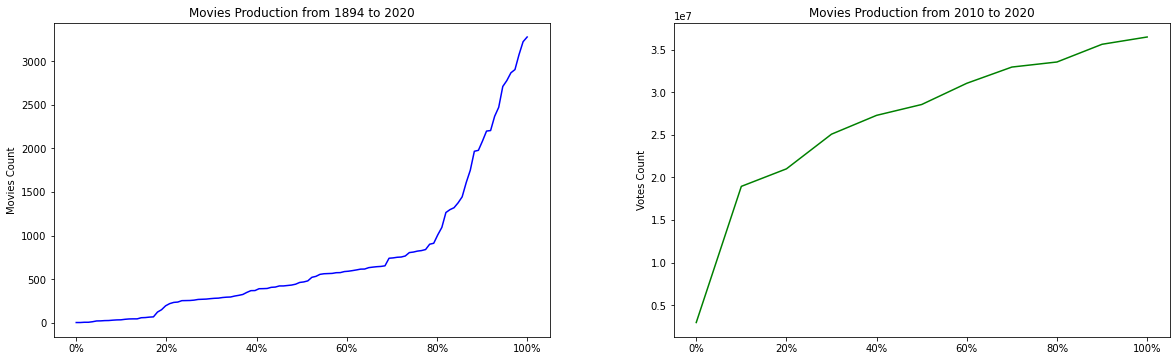

In [12]:
#production analysis by year

unique_years = np.sort(imdb['year'].unique())
unique_movies_count_by_year = dict()
unique_vote_count_by_year = dict()

for year in unique_years:
    unique_movies_count_by_year[year]= (imdb['year']==year).sum()
    unique_vote_count_by_year[year] =  imdb.loc[imdb['year'] == year, 'total_votes'].sum()

movie_list_reversed     = [v for k,v in sorted(unique_movies_count_by_year.items(), key=lambda k : k[1], reverse=False)]
vote_list_reversed      = [v for k,v in sorted(unique_vote_count_by_year.items(),   key=lambda k : k[1], reverse=False)]
x1 = np.linspace(0,100,len(unique_years))


unique_years_decade     = dict()
unique_years_from_2010  = [x for x in unique_years if x >=2010]
for year in unique_years_from_2010:
    unique_years_decade[year]  = imdb.loc[imdb['year'] == year, 'total_votes'].sum()
    
unique_years_decade_2010k  = [k for k,v in sorted(unique_years_decade.items(), key=lambda k : k[1], reverse=False)]
unique_years_decade_2010v  = [v for k,v in sorted(unique_years_decade.items(), key=lambda k : k[1], reverse=False)]
x2 = np.linspace(0,100,len(unique_years_decade_2010v))


fig = plt.figure(figsize=[20,13])
fig.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
fig.subplots_adjust(wspace=0.25, hspace=0.25)
fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)

ax1=fig.add_subplot(2,2,1)
ax1.set_ylabel('Movies Count')
ax1.set_title(f"Movies Production from {imdb['year'].min()} to {imdb['year'].max()}")
ax1.plot(x1,movie_list_reversed , color='b', label='Movie Production')
ax1.xaxis.set_major_formatter(xticks)

ax2=fig.add_subplot(2,2,2)
ax2.set_ylabel('Votes Count')
ax2.set_title(f"Movies Production from {min(unique_years_decade_2010k)} to {max(unique_years_decade_2010k)}")
ax2.xaxis.set_major_formatter(xticks)
ax2.plot(x2,unique_years_decade_2010v, color='g', label='Total Votes')


# ax1.legend(loc='upper left')
plt.show()

## Country Analysis

<img src="./img/arrow_down.png" width="25" height="25" style="float:left">

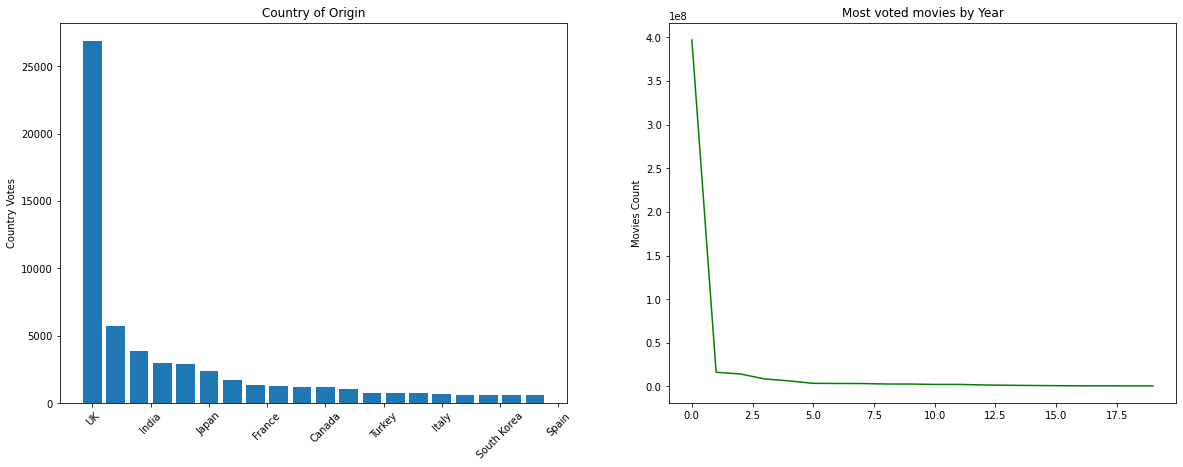

In [16]:
# imdb analysis by country 
unique_countries = set()
votes_by_country = dict()
country_count = dict()

unique_countries = pdf.unpack_series(imdb,'country')

for country in unique_countries:
    votes_by_country[country] = imdb.loc[imdb['country'] == country, 'total_votes'].sum()
    country_count[country]    = (imdb['country']==country).sum()
    #{k:v for k,v in country_count.items() if k=="USA"}

votes_by_country_keys   = [(k) for k, v in sorted(votes_by_country.items(), key=lambda item : item[1], reverse=True) if v> 0][:20]
votes_by_country_values = [(v) for k, v in sorted(votes_by_country.items(), key=lambda item : item[1], reverse=True) if v> 0][:20]


country_count_key       = [(k) for k,v in sorted(country_count.items(), key=lambda item : item[1], reverse=True) if v> 0][:20]
country_count_values    = [(v) for k,v in sorted(country_count.items(), key=lambda item : item[1], reverse=True) if v> 0][:20]
#country_count_percent   = [(v/imdb['country'].size*100) for k,v in sorted(country_count.items(), key=lambda item : item[1], reverse=True) if v> 0]


country_x_axis          = range(len([(v) for k,v in country_count.items() if v >0]))[:20]

fig = plt.figure(figsize=[20,7])
ax1=fig.add_subplot(121)
ax1.set_ylabel('Country Votes')
ax1.set_title("Country of Origin")
ax1.xaxis.set_tick_params(rotation=45)
ax1.set_xticklabels(votes_by_country_keys)
ax1.bar(country_x_axis, country_count_values)
ax2=fig.add_subplot(122)
ax2.set_ylabel('Movies Count')
ax2.set_title("Most voted movies by Year")
ax2.plot(country_x_axis, votes_by_country_values , color='g', label='Country Counts')
plt.show()

## weighted rating formula Analysis

<img src="./img/arrow_down.png" width="25" height="25" style="float:left">

IMDB’s weighted rating formula as metric. Mathematically, it can be represented as follows

<img src="./img/Weighted_Rating_formula.png" width="250" height="200" style="float:left">

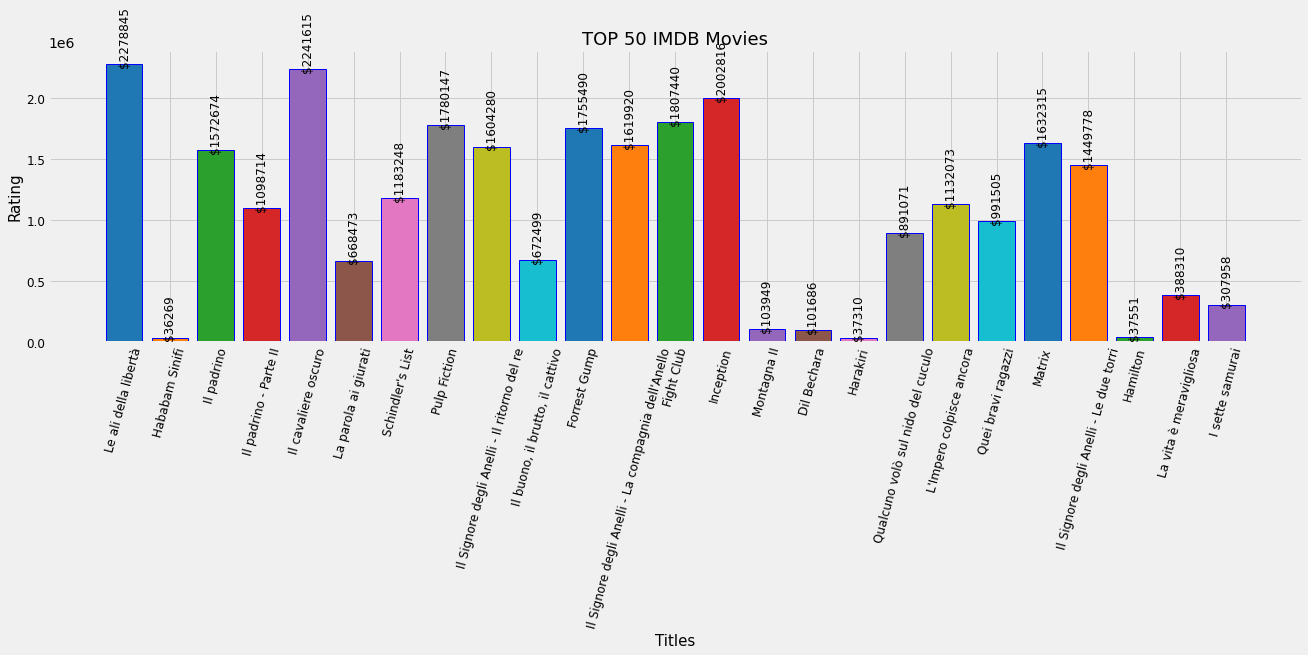

In [31]:
imdb_top_movie             = dict()
imdb_top_movie_v_title     = list()
imdb_top_movie_v_rating    = list()

imdb_top_movie=pdf.weighted_rating(imdb,'title','duration','avg_vote','total_votes',25)
imdb_top_movie_v_title, imdb_top_movie_v_rating = zip(*imdb_top_movie.items())

imdb_top_movie_votes       = {k:0 for k,v in imdb_top_movie.items()}
imdb_top_movie_votes_title = list()
imdb_top_movie_votes_value = list()
for movie_vote in imdb_top_movie_votes:
        imdb_top_movie_votes[movie_vote] = imdb.loc[imdb['title'] == movie_vote, 'total_votes'].values[0]
imdb_top_movie_votes_title, imdb_top_movie_votes_value = zip(*imdb_top_movie_votes.items())

colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
top250_x = list(range(len(imdb_top_movie_v_rating)))
plt.style.use(("fivethirtyeight"))
plt.figure(figsize = (20,5)) # width and height of figure is defined in inches
plt.title("TOP 50 IMDB Movies", fontsize=18)
plt.bar(imdb_top_movie_v_title, imdb_top_movie_votes_value, color=colors ,edgecolor='blue', linewidth = 1)
plt.xlabel("Titles",fontsize=15)  # x axis shows the States
plt.ylabel("Rating",fontsize=15)  # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=75)
plt.yticks(fontsize=12)

for k,v in imdb_top_movie_votes.items(): #To show the exact revenue generated on the figure
    plt.text(k,v,'$'+ str(round(v,2)), fontsize=12,rotation=90,color='k', horizontalalignment='center');


## Conclusion

<img src="./img/arrow_down.png" width="25" height="25" style="float:left">

Drama, Comedy, Romance, and Action are the most popular genres in general, and make
up about 50% of all movies made from 1984-2020.
Since 1984, Drama has been the most popular genre per decade except for the 80's when Comedy was more poular.
Production lengths has soared from 1984 to 2020.
Revenue and profitability have a weak positive correlation.